<a href="https://colab.research.google.com/github/siddharthc30/Image_Classification/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharthcilamkoti","key":"d78132fac6a78daadbfc34f5acf9754b"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.7MB/s]
100% 270M/271M [00:05<00:00, 77.3MB/s]
100% 271M/271M [00:05<00:00, 51.0MB/s]
 99% 537M/543M [00:05<00:00, 111MB/s]
100% 543M/543M [00:06<00:00, 94.5MB/s]


In [0]:
from zipfile import ZipFile
with ZipFile('train.zip','r') as zip:
  zip.extractall()

with ZipFile('test1.zip','r') as zip:
  zip.extractall()  

In [7]:
! pip install keras

In [8]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
Train_Dir='./train'
Test_Dir='./test1'

IMG=os.listdir(Train_Dir)

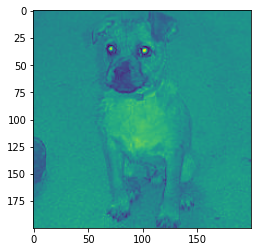

In [10]:
 for img in os.listdir(Train_Dir):
  img_array=cv2.imread(os.path.join(Train_Dir,img),cv2.IMREAD_GRAYSCALE)
  plt.imshow(img_array)
  plt.show()
  break

In [11]:
print(img_array.shape)

(200, 200)


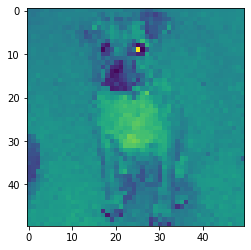

In [12]:
img_size=50
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)

In [0]:
training_data=[]

def create_trainingdata():
    for img in IMG:
      try:
        category=img.split('.')[0]
        if category == 'dog':
          label=1
        else:
          label=0  
        img_array =cv2.imread(os.path.join(Train_Dir,img),cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array,(img_size,img_size))
        ##plt.imshow(new_array)
        ##plt.show()
        ##print(label)
        ##by running the above commented line we can check the labelling
        training_data.append([new_array,label])
      except Exception as e:
        pass

create_trainingdata()  

In [14]:
print(len(training_data))   

25000


In [0]:
import random 
random.shuffle(training_data)

In [0]:
X=[]
Y=[]
from keras.optimizers import RMSprop
for features, label in training_data:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,1)

In [0]:
Y= keras.utils.to_categorical(Y,num_classes=2)

In [18]:
Y.shape

(25000, 2)

In [19]:
X.shape

(25000, 50, 50, 1)

In [0]:
datagen = ImageDataGenerator(
        rescale=1.0/255.0,   
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X)

In [0]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=np.random)

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(50,50,1), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))
    
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

In [25]:
history=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=30, batch_size=32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6793 - accuracy: 0.5796 - val_loss: 0.6333 - val_accuracy: 0.6526
Epoch 2/30
20000/20000 [==============================] - 21s 1ms/step - loss: 0.5875 - accuracy: 0.6924 - val_loss: 0.5273 - val_accuracy: 0.7432
Epoch 3/30
20000/20000 [==============================] - 20s 1ms/step - loss: 0.5021 - accuracy: 0.7585 - val_loss: 0.4703 - val_accuracy: 0.7852
Epoch 4/30
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4481 - accuracy: 0.7956 - val_loss: 0.5358 - val_accuracy: 0.7424
Epoch 5/30
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3965 - accuracy: 0.8256 - val_loss: 0.4154 - val_accuracy: 0.8116
Epoch 6/30
20000/20000 [==============================] - 20s 1ms/step - loss: 0.3469 - accuracy: 0.8518 - val_loss: 0.4339 - val_accuracy: 0.8030
Epoch 7/30
20000/20000 [==============================] - 20s 1ms/ste

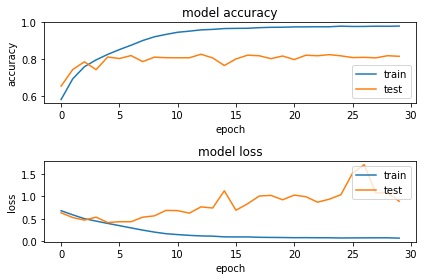

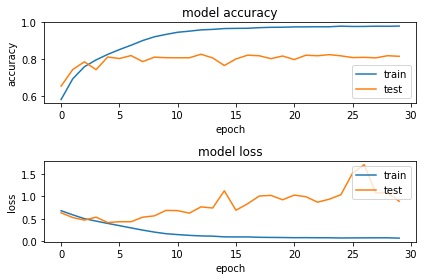

In [37]:
 fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [0]:
testing_data=[]

def create_testingdata():
    for img in os.listdir(Test_Dir):
      try:      
        iarray =cv2.imread(os.path.join(Test_Dir,img),cv2.IMREAD_GRAYSCALE)
        narray =cv2.resize(iarray,(img_size,img_size))
        ##plt.imshow(new_array)
        ##plt.show()
        ##print(label)
        ##by running the above commented line we can check the labelling
        testing_data.append([narray])
      except Exception as e:
        pass

create_testingdata()

In [60]:
testing_data=np.array(testing_data).reshape(-1,img_size,img_size,1)

testing_data.shape


(12500, 50, 50, 1)

In [0]:
pred=model.predict(testing_data)

